The Journal of Women's Health published an article by Arthur A. Mirin discussing the NIH funding level of various diseases normalized to the disease burden. One immediate conclusion is that relative to their disease burden, several female-dominant [sic] diseases are underfunded, including:
- Endometriosis
- Adenomyosis
- Uterine Fibroids
- Anorexia

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8290307/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams["figure.dpi"] = 200
matplotlib.rcParams["figure.facecolor"] = "white"

In [4]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

In [2]:
data = pd.read_table("../data/PMC8290307.tsv", thousands=",")

In [3]:
data.Classification = data.Classification.astype("category")

In [5]:
data["2015 DALY log"] = np.log10(data["2015 DALY (M)"])
data["Actual 2019 log"] = np.log10(data["Actual 2019 $ (M)"])

In [6]:
lm = OLS(data["Actual 2019 log"], sm.add_constant(data["2015 DALY log"]))
res = lm.fit()

In [7]:
endo_x, endo_y = data.loc[data["Disease/condition"].isin(["Endometriosis"])][["2015 DALY log", "Actual 2019 log"]].values[0].T

In [9]:
highlight_data = data[data["Disease/condition"].isin(["Endometriosis", "Fibroid tumors (uterine)", "Diabetes", "Anorexia"])].copy()
highlight_data.loc[data["Disease/condition"].isin(["Fibroid tumors (uterine)"]), "Disease/condition"] = "Fibroid tumors"

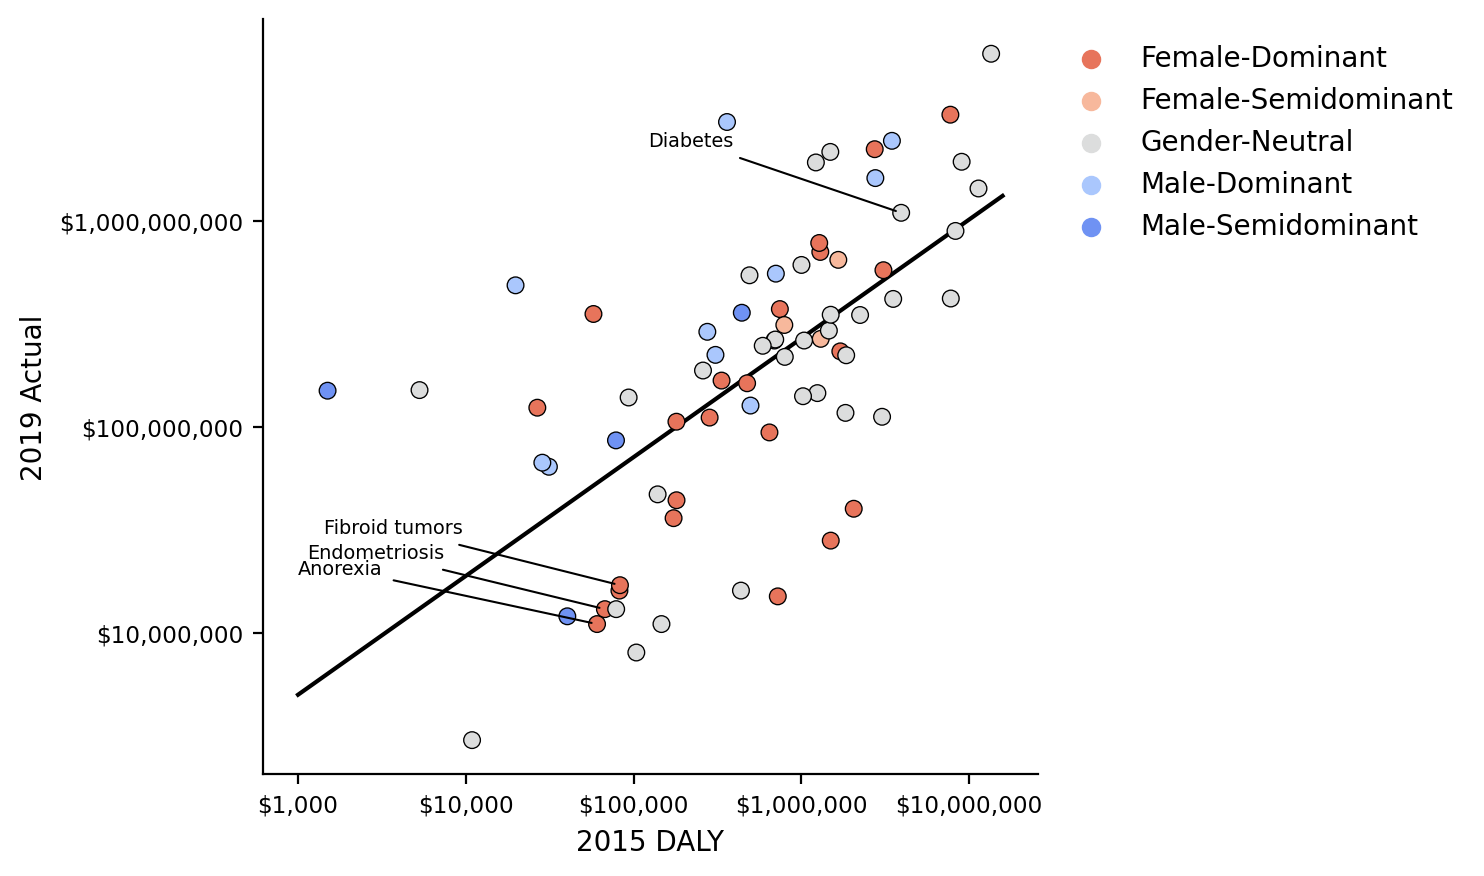

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.scatterplot(data=data, x="2015 DALY log", y="Actual 2019 log", hue="Classification", palette=sns.mpl_palette("coolwarm_r", 5), edgecolor="k", ax=ax)
ax.legend(*ax.get_legend_handles_labels(), bbox_to_anchor=(1,1), frameon=False)

ax.set_xticks([(k-6) for k in range(3, 8)])
ax.set_xticklabels([f"${10**k:,}" for k in range(3, 8)], fontsize="small")
ax.set_yticks([(k-3) for k in range(3, 8)])
ax.set_yticklabels([f"${10**k:,}" for k in range(6, 11)], fontsize="small")
ax.set_xlabel("2015 DALY")
ax.set_ylabel("2019 Actual")

x = np.linspace(-3, 1.2, 50)
y = res.params[0] + res.params[1]*x
ax.plot(x, y, "k-", zorder=-10)

for _, row in highlight_data.iterrows():
    name, x, y = row[["Disease/condition", "2015 DALY log", "Actual 2019 log"]]
    ax.annotate(name, (x, y), xytext=(x*1.15-1.6, y*1.04+0.2), arrowprops={"arrowstyle": "-", "lw": 0.75}, fontsize="x-small")

sns.despine(ax=ax)